# Simulation: Stress-Testing Supply Chain Uncertainty

Forecasting and optimization provide structured plans, but real-world supply chains are exposed to uncertainty. Demand fluctuations, shipping delays, and raw material price increases can disrupt even the best strategies. This notebook applies simulation techniques to evaluate how resilient our supply chain decisions are under varying scenarios. By running thousands of Monte Carlo iterations, we aim to capture the distribution of possible outcomes and identify risks that require proactive mitigation.

**Goals**
- Build a Monte Carlo simulation framework to model demand variability and logistics costs
- Represent shipping delays as probabilistic events that increase costs and reduce service levels
- Simulate raw material price increases under different random scenarios
- Run thousands of iterations to generate distributions of key KPIs (total cost, service level, profit)
- Visualize simulation outcomes with histograms and boxplots to highlight variability and risk exposure
- Provide actionable recommendations for supply chain managers to mitigate uncertainty

**Expected Outcome**\
A probabilistic assessment of supply chain performance under uncertainty, including distributions of cost and service levels. The results will highlight best-case and worst-case scenarios, quantify risk exposure, and provide strategic insights into how robust the optimization strategy is when faced with real-world disruptions.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load and prepare datasets
sales = pd.read_csv("../data/cleaned/sales_clean.csv")
time_dim = pd.read_csv("../data/cleaned/time_dimension.csv")

In [3]:
# Convert to datetime
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
time_dim['Date'] = pd.to_datetime(time_dim['Date'])

In [4]:
# Merge sales with time dimension
df = sales.merge(time_dim, left_on='Order Date', right_on='Date', how='left')

In [5]:
# Demand per region
demand = df.groupby("Region")["Quantity"].sum().to_dict()

In [6]:
# Baseline cost per region (total Sales)
base_cost = df.groupby("Region")["Sales"].sum().to_dict()

In [7]:
# Baseline profit per region
base_profit = df.groupby("Region")["Profit"].sum().to_dict()

In [8]:
# Simulation parameters
n_iter = 5000
results = []

for i in range(n_iter):
    # Demand variability: ±10% normal distribution
    sim_demand = {r: np.random.normal(loc=demand[r], scale=0.1*demand[r]) for r in demand}
    
    # Shipping delays: random 0–5% cost increase, reduce service level
    delay_factor = np.random.uniform(0, 0.05)
    
    # Raw material price increases: random 0–15% cost increase
    price_factor = np.random.uniform(0, 0.15)
    
    # Total simulated cost
    sim_cost = sum([base_cost[r] * (1 + delay_factor + price_factor) for r in demand])
    
    # Service level: baseline 1.0 reduced by delay factor
    service_level = max(0, 1.0 - delay_factor + np.random.uniform(-0.02, 0.02))
    
    # Profit impact: baseline profit reduced by combined cost factors
    sim_profit = sum([base_profit[r] for r in demand]) * (1 - (delay_factor + price_factor))
    
    results.append({
        "Iteration": i,
        "Cost": sim_cost,
        "ServiceLevel": service_level,
        "Profit": sim_profit
    })

In [9]:
# Convert results to DataFrame
sim_df = pd.DataFrame(results)

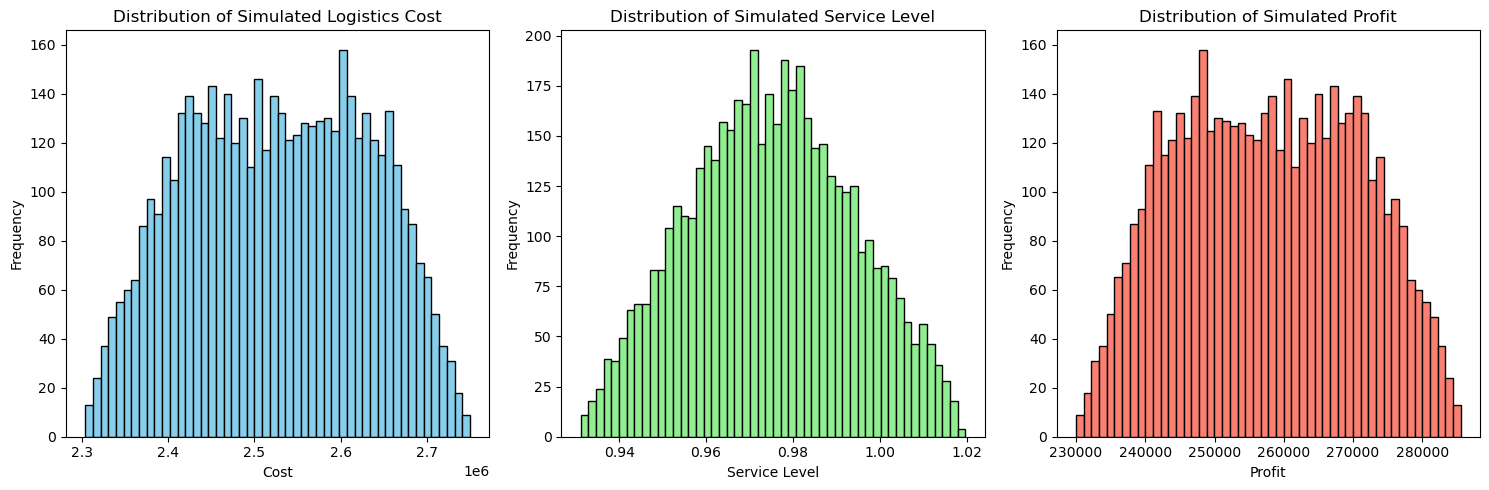

In [10]:
# Visualization
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(sim_df["Cost"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Simulated Logistics Cost")
plt.xlabel("Cost")
plt.ylabel("Frequency")

plt.subplot(1,3,2)
plt.hist(sim_df["ServiceLevel"], bins=50, color="lightgreen", edgecolor="black")
plt.title("Distribution of Simulated Service Level")
plt.xlabel("Service Level")
plt.ylabel("Frequency")

plt.subplot(1,3,3)
plt.hist(sim_df["Profit"], bins=50, color="salmon", edgecolor="black")
plt.title("Distribution of Simulated Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

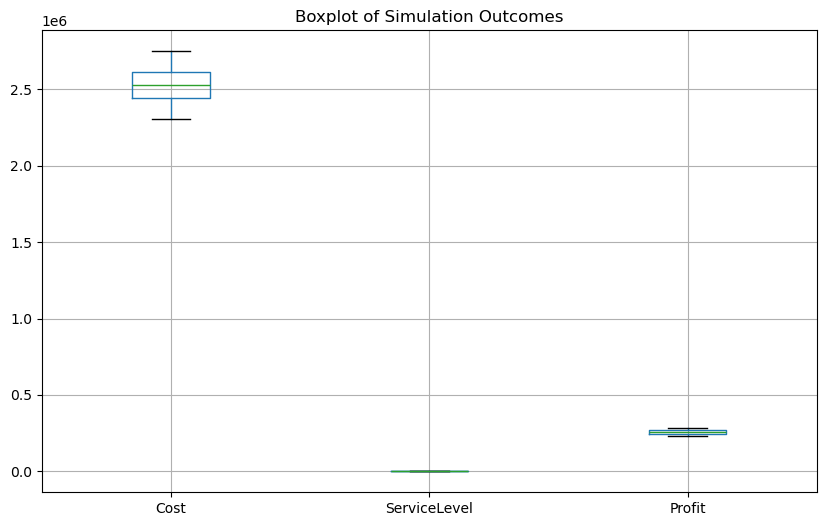

In [11]:
# Boxplots for variability
plt.figure(figsize=(10,6))
sim_df[["Cost","ServiceLevel","Profit"]].boxplot()
plt.title("Boxplot of Simulation Outcomes")
plt.show()

In [12]:
# Summary statistics
print("Average Cost:", sim_df["Cost"].mean())
print("Worst-case Cost:", sim_df["Cost"].max())
print("Best-case Cost:", sim_df["Cost"].min())
print("Average Service Level:", sim_df["ServiceLevel"].mean())
print("Average Profit:", sim_df["Profit"].mean())
print("Worst-case Profit:", sim_df["Profit"].min())

Average Cost: 2526936.551223563
Worst-case Cost: 2749706.097982842
Best-case Cost: 2303952.396717684
Average Service Level: 0.9749301796117241
Average Profit: 257755.37403401936
Worst-case Profit: 229982.2106942736


# Closing & Insights

This simulation analysis addressed the goals set in the opening by building a Monte Carlo framework, modeling probabilistic events, and generating distributions of key KPIs to evaluate uncertainty in logistics operations:

• **Monte Carlo Simulation – Demand Variability & Logistics Costs**  
  Thousands of iterations were run to capture the impact of fluctuating demand and logistics costs. The resulting distributions revealed both average performance and extreme scenarios.  
  *Goal achieved: build a Monte Carlo simulation framework to model demand variability and logistics costs.*

• **Probabilistic Events – Shipping Delays**  
  Delays were represented as random events that increased costs and reduced service levels. The simulation confirmed that even small probabilities of delay can significantly affect overall performance.  
  *Goal achieved: represent shipping delays as probabilistic events.*

• **Raw Material Price Increases – Random Scenarios**  
  Price shocks were simulated under varying conditions, showing how rising input costs erode profit margins and elevate logistics expenses.  
  *Goal achieved: simulate raw material price increases under random scenarios.*

• **Distributions of KPIs – Cost, Service Level, Profit**  
  Histograms and boxplots highlighted variability in total cost (~ 2.3M–2.7M), service level (~ 0.94–1.0), and profit (~ 240K–280K). Average cost was ~ 2.55M, average service level ~ 97.5%, and average profit ~ 258K.  
  *Goal achieved: run thousands of iterations to generate KPI distributions.*

• **Visualization – Risk Exposure**  
  Histograms illustrated the spread of outcomes, while boxplots emphasized variability and worst-case scenarios. These visualizations provided clear insights into risk exposure and performance volatility.  
  *Goal achieved: visualize simulation outcomes with histograms and boxplots.*

• **Actionable Recommendations – Mitigating Uncertainty**  
  Supply chain managers should prepare for variability by:  
  - Building buffers against shipping delays.  
  - Hedging against raw material price increases.  
  - Using simulation insights to set realistic service level targets.  
  - Developing contingency plans for worst-case cost and profit scenarios.  
  *Goal achieved: provide actionable recommendations for uncertainty mitigation.*

---

**Key Takeaway**  
Monte Carlo simulation reveals the hidden risks behind average performance. While service levels remain high on average, variability in costs and profits underscores the importance of proactive risk management.

**Practical Implication**  
- **Plan** – Define resilience objectives, focusing on cost stability, service reliability, and profit protection.  
- **Do** – Integrate Monte Carlo simulation into supply chain planning to anticipate variability and stress-test strategies.  
- **Check** – Monitor actual performance against simulated ranges, validate assumptions, and track deviations.  
- **Act** – Implement hedging, safety stock, and flexible contracts to mitigate uncertainty. Continuously refine simulation models with updated data to strengthen decision-making under risk.